# This jupyter notebook is intended to calculate epsp amplitudes from an abf file and store it in an excel sheet.

## Plot Abf sweeps
## Subtract baseline
## Manually remove some sweeps
## Clip voltages
## Calculate average sweep and plot it

In [140]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyabf

# Load ABF File 

In [671]:
'''This commands loads the abf file and prints the relevant information about it.
   Replace the file address to use it.
'''

abf = pyabf.ABF(r"C:\Users\Jackie.MEDICINE\sohaib_data\OneDrive - Technion\2020\LTP\CCh pharamacology\distal\scoploamine\19_05_2022\electrophysiology\19_05_22_0012.abf")
print("\033[1m" + str(abf) + "\033[0m")

ABF (version 2.0.0.0) with 2 channels (mV, pA), sampled at 10.0 kHz, containing 12 sweeps, having no tags, with a total length of 6.17 minutes, recorded with protocol "LTP_control_0.03Hz_bottomStim_upperStim_CH1".


In [672]:
'''Use this to know more about the electrophysiological data.
   In this I select the 4th sweep of the electrophysiologcial recording,
   and print its X and Y values.
'''

abf.setSweep(3)
print("sweep data (ADC):", abf.sweepY)
print("sweep command (DAC):", abf.sweepC)
print("sweep times (seconds):", abf.sweepX)

sweep data (ADC): [-78.772  -78.6621 -78.7414 ... -78.9246 -79.0039 -78.8208]
sweep command (DAC): [0. 0. 0. ... 0. 0. 0.]
sweep times (seconds): [0.     0.0001 0.0002 ... 9.9997 9.9998 9.9999]


In [674]:
# No. of Sweeps in the file 
print('Number of sweeps in this file:' ,abf.sweepCount)

Number of sweeps in this file: 12


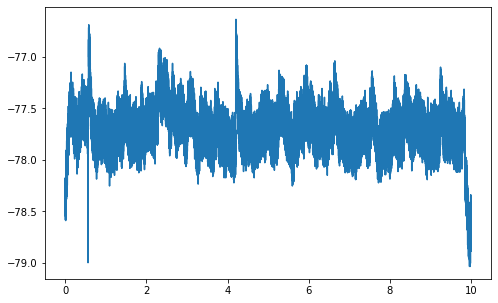

In [673]:
'''
This is a sample plot of the data. Here,We plot 5th sweep from the loaded abf file.

'''
abf.setSweep(4)
plt.figure(figsize=(8, 5))
plt.plot(abf.sweepX, abf.sweepY)
plt.show()

# Display all sweeps 

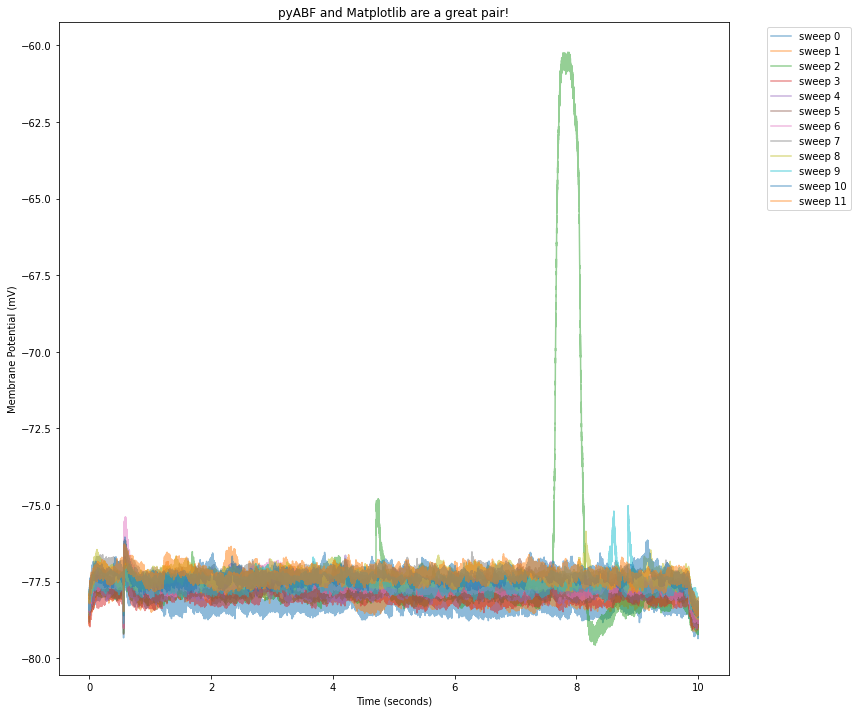

In [675]:
'''Use this piece of code to print all the sweeps
'''

plt.figure(figsize=(12, 12))
plt.title("pyABF and Matplotlib are a great pair!")
plt.ylabel(abf.sweepLabelY)
plt.xlabel(abf.sweepLabelX)
for i in range(0,abf.sweepCount):
    abf.setSweep(i)
    plt.plot(abf.sweepX, abf.sweepY, alpha=.5, label="sweep %d" % (i))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [2]:
   '''
   In this abf file, an epsp is given at 0.03Hz. 
   If we want to calculate the epsp size on all the sweeps,
   we need to know the baseline of each sweep and the time range in which the epsp is evoked.
   
   The following code can be run to select the baseline and the time range in which we want to detect the epsp.
   Different blocks of code are corressponding to different frequencies of data which you might have. Use or amend 
   them according to your stimulation frequency and set the baseline region accordingly.
   
   '''

'\nIn this abf file, an epsp is given at 0.03Hz. \nIf we want to calculate the epsp size on all the sweeps,\nwe need to know the baseline of each sweep and the time range in which the epsp is evoked.\n\nThe following code can be run to select the baseline and the time range in which we want to detect the epsp.\nDifferent blocks of code are corressponding to different frequencies of data which you might have. Use or amend \nthem according to your stimulation frequency and set the baseline region accordingly.\n\n'

In [676]:
#0.03Hz

base_line= [8,10]   # Enter the time range which you want to use as the baseline
Stimulus_Region = [0.3,0.7]

In [640]:
#0.1Hz

base_line= [2.5,3]   # Enter the time range which you want to use as the baseline
Stimulus_Region = [0.2,0.7]

In [325]:
#0.5Hz

base_line= [1.5,1.75]   # Enter the time range which you want to use as the baseline
Stimulus_Region = [0.2,0.7]

In [658]:
#1Hz

base_line= [0.2,0.25]   # Enter the time range which you want to use as the baseline
Stimulus_Region = [0,0.2]

# Manual removal of sweeps

In [677]:
#Define the sweep numpber in the list

remove=[]  # Leave blank if you don't want to remove any.

new_list=[item for item in abf.sweepList if item not in remove]   # New list after removing the desired sweeps

In [678]:
'''If you want to print the sweeps after removing 
   some of them, use this code, else # it.
'''


plt.figure(figsize=(12, 12))
plt.title("After manually removing the sweep(s) ")
plt.ylabel(abf.sweepLabelY)
plt.xlabel(abf.sweepLabelX)

for i in new_list:
    abf.setSweep(i)
    plt.plot(abf.sweepX, abf.sweepY, alpha=.5, label="sweep %d" % (i))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()    

# Subtract Baseline

In [679]:
''' Use this code to subtract a baseline from all the sweeps if required.
    And then plot them
'''

# plot a sweep the regular way
plt.figure(figsize=(12, 12))
plt.title("Original Sweeps")
plt.ylabel(abf.sweepLabelY)
plt.xlabel(abf.sweepLabelX)

for i in new_list:
    abf.setSweep(i)
    plt.plot(abf.sweepX, abf.sweepY, alpha=.5, label="sweep %d" % (i))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()        

# Plot after baseline substraction
plt.figure(figsize=(10, 15))
plt.title("After Subtracting the Baseline")
plt.ylabel(abf.sweepLabelY)
plt.xlabel(abf.sweepLabelX)

for i in new_list:
    abf.setSweep(i,baseline=base_line)   
    plt.plot(abf.sweepX, abf.sweepY, alpha=.8, label="subtracted %d" %(i))
         

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Clip sweep values

In [ ]:
'''You can clip the voltage above a threshold in some sweeps if you want. 
   

In [680]:

to_be_clipped = []  #Enter the sweep numbers you want to clip
clipping_voltage = 20  # Specify your clipping voltage mV with respect to the baseline


In [681]:
'''Plot all the sweeps after clipping
'''

plt.figure(figsize=(12, 12))
plt.title("After clipping the desired sweep(s) ")
plt.ylabel(abf.sweepLabelY)
plt.xlabel(abf.sweepLabelX)

for i in new_list:
    abf.setSweep(i,baseline=base_line)
    if i in to_be_clipped:
        new_abf_sweepY= [clipping_voltage if j >clipping_voltage else j for j in abf.sweepY]
        print("Clipped Sweep No.", i)
        plt.plot(abf.sweepX, new_abf_sweepY, alpha=.5, label="sweep %d" % (i))
    else:
        plt.plot(abf.sweepX, abf.sweepY, alpha=.5, label="sweep %d" % (i))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Average Value of the sweep

[-0.5764 -0.6613 -0.6624 ... -0.933  -0.934  -0.9365]


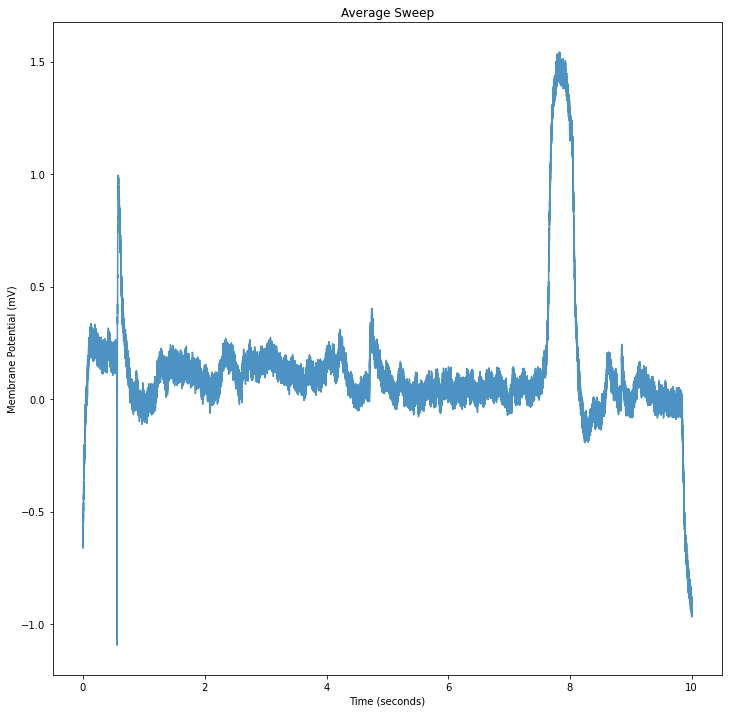

In [682]:

summate_sweeps=[]
for i in new_list:
    abf.setSweep(i,baseline=base_line)
    if i in to_be_clipped:
        new_abf_sweepY= [clipping_voltage if j >clipping_voltage else j for j in abf.sweepY]
        summate_sweeps.append(new_abf_sweepY)
        

    else:
        summate_sweeps.append(abf.sweepY)

mean_sweep= np.mean(summate_sweeps,axis=0)
print(np.mean(summate_sweeps,axis=0))

plt.figure(figsize=(12, 12))
plt.title("Average Sweep")
plt.ylabel(abf.sweepLabelY)
plt.xlabel(abf.sweepLabelX)
# plt.xaxis([25, 45, -70, 50])

plt.plot(abf.sweepX, np.mean(summate_sweeps,axis=0), alpha=.8, label="Avg %d" %(i))

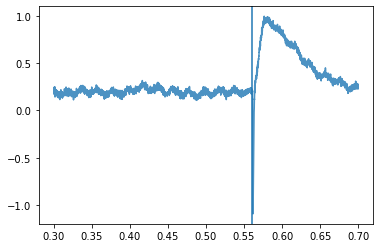

In [683]:
'''This code graphically shows with the help of a vertical line which value is used as baseline to calculate the
   epsp amplitude.
   The code here is suitable if the sampling frequency of your recordings is 10kHz. You will have to change the
   multiplication factor if you do not have 10kHz sampling rate.
'''
#mean_sweep[int(Stimulus_Region[0]*10000),int(Stimulus_Region[1]*10000),15000]
a=[val for i,val in enumerate(mean_sweep) if i>Stimulus_Region[0]*10000 and i<Stimulus_Region[1]*10000]
b=[val for i,val in enumerate(abf.sweepX) if i>Stimulus_Region[0]*10000 and i<Stimulus_Region[1]*10000]
plt.plot(b, a, alpha=.8, label="Avg %d" %(i))
plt.axvline(x=b[np.where(a==min(a))[0][0]-15])

In [684]:
# Baseline= np.mean(a[:np.where(a==min(a))[0][0]-15]) # This assumes that the artefact takes 15 samples to reach its minimum value.

Baseline=a[np.where(a==min(a))[0][0]-15]
print('Baseline value is', a[np.where(a==min(a))[0][0]-15])
Avg_spike_value = max(a)-Baseline
print('Avg Value of the epsp is', Avg_spike_value )

0.19568634
Avg Value of the spike is 0.79956055


In [685]:
'''This code stores the epsp amplitudes of all the sweeps, convert it to a dataframe,
   and stores it in an excel sheet.
'''

epsp=[]
time=[]

for i in new_list:
    abf.setSweep(i,baseline=base_line)
    if i in to_be_clipped:
        new_abf_sweepY= [clipping_voltage if j >clipping_voltage else j for j in abf.sweepY]
        a=[val for i,val in enumerate(new_abf_sweepY) if i>Stimulus_Region[0]*10000 and i<Stimulus_Region[1]*10000]
        b=[val for i,val in enumerate(abf.sweepX) if i>Stimulus_Region[0]*10000 and i<Stimulus_Region[1]*10000]
        epsp.append(max(a)-a[np.where(a==min(a))[0][0]-15])
        time.append(b[np.where(a==max(a))[0][0]])

    else:
        a=[val for i,val in enumerate(abf.sweepY) if i>Stimulus_Region[0]*10000 and i<Stimulus_Region[1]*10000]
        b=[val for i,val in enumerate(abf.sweepX) if i>Stimulus_Region[0]*10000 and i<Stimulus_Region[1]*10000]
        epsp.append(max(a)-a[np.where(a==min(a))[0][0]-15])
        time.append(b[np.where(a==max(a))[0][0]])

In [686]:
'''Put all the values in a dataframe
'''

df=pd.DataFrame(columns=['EPSP Value','Time','Time in sweep'])
df['EPSP Value']=epsp
df['Time']=np.cumsum(time)
df['Time in sweep']=time

In [687]:
df

,EPSP Value,Time,Time in sweep
0,0.964355,0.5772,0.5772
1,0.994873,1.1649,0.5877
2,0.927734,1.7381,0.5732
3,0.946045,2.3186,0.5805
4,0.939941,2.8990,0.5804
5,1.605225,3.4786,0.5796
6,2.239990,4.0698,0.5912
7,0.793457,4.6655,0.5957
8,0.592041,5.2515,0.5860
9,0.610352,5.9079,0.6564


In [688]:
df.to_excel('C:\\Users\\Jackie.MEDICINE\\Desktop\\abf_output.xlsx')

In [438]:
### If you want elaborated information of the abf file you have loaded. Run this command.

print(abf.headerText)

C:\Users\Jackie.MEDICINE\Anaconda3\lib\site-packages\pyabf\abfHeaderDisplay.py:83: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if value == "~SECTION~":
C:\Users\Jackie.MEDICINE\Anaconda3\lib\site-packages\pyabf\abfHeaderDisplay.py:85: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif value == "~DOCS~":



### ABF Class Methods ###
abf.launchInClampFit()
abf.saveABF1()
abf.setSweep()
abf.sweepD()

### ABF Class Variables ###
abfDateTime = 2022-01-23 16:33:21.048000
abfDateTimeString = 2022-01-23T16:33:21.048
abfFileComment =
abfFilePath = C:\Users\Jackie.MEDICINE\sohaib_data\OneDrive - Technion\2020\LTP\STDP\Distal\23_01_2022\electrophysiology\23_01_22_0005.abf
abfFolderPath = C:\Users\Jackie.MEDICINE\sohaib_data\OneDrive - Technion\2020\LTP\STDP\Distal\23_01_2022\electrophysiology
abfID = 23_01_22_0005
abfVersion = {'major': 2, 'minor': 0, 'bugfix': 0, 'build': 0}
abfVersionString = 2.0.0.0
adcNames = ['IN 0', 'IN 1']
adcUnits = ['mV', 'pA']
channelCount = 2
channelList = [0, 1]
creator = Clampex 10.3.1.5
creatorVersion = {'major': 10, 'minor': 3, 'bugfix': 1, 'build': 5}
creatorVersionString = 10.3.1.5
dacNames = ['OUT 0', 'OUT 1']
dacUnits = ['nA', 'mV']
data = [[-93.7134 -93.75   -93.7866 ... -94.5557 -94.3664 -94.3603]
[  8.5449  25.0244   0.     ...   0.      -2.4414  23.8037]]
da

In [3]:
'''Feel free to reach me out at mohdsohaib786@gmail.com if you have any doubts on how to use it
'''

'Feel free to reach me out at mohdsohaib786@gmail.com if you have any doubts on how to use it\n'